# African Heart Disease - Project 1

Link:
https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data

Information about data

A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal. 

sbp		systolic blood pressure
tobacco		cumulative tobacco (kg)
ldl		low densiity lipoprotein cholesterol
adiposity
famhist		family history of heart disease (Present, Absent)
typea		type-A behavior
obesity
alcohol		current alcohol consumption
age		age at onset
chd		response, coronary heart disease

In [38]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

## Load data

In [3]:
# Load csv file and print the first 5 rows
df = pd.read_csv('data/african_heart_disease_data.csv')
print(df.head())

   row.names  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
0          1  160    12.00  5.73      23.11  Present     49    25.30    97.20   
1          2  144     0.01  4.41      28.61   Absent     55    28.87     2.06   
2          3  118     0.08  3.48      32.28  Present     52    29.14     3.81   
3          4  170     7.50  6.41      38.03  Present     51    31.99    24.26   
4          5  134    13.60  3.50      27.78  Present     60    25.99    57.34   

   age  chd  
0   52    1  
1   63    1  
2   46    0  
3   58    1  
4   49    1  


## Data Wrangling

In [22]:
# Extract attribute names (excluding row names)
attributeNames = df.columns[1:].tolist()  # Skip the first column

# Convert categorical 'famhist' to numerical values
df["famhist"] = df["famhist"].astype("category").cat.codes  # Convert Present/Absent to 1/0

# Extract feature matrix X
X = df.iloc[:, 1:].values  # Exclude row names

# Compute dataset properties
N, M = X.shape  # Number of observations and attributes

# Print 
print("Attribute names:")
print(attributeNames)
np.set_printoptions(suppress=True)  # Suppress scientific notation
print("\nX:")
print(X)
print(f"\nX with {N} samples and {M} attributes.")

Attribute names:
['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd']

X:
[[160.    12.     5.73 ...  97.2   52.     1.  ]
 [144.     0.01   4.41 ...   2.06  63.     1.  ]
 [118.     0.08   3.48 ...   3.81  46.     0.  ]
 ...
 [108.     3.     1.59 ...  26.64  55.     0.  ]
 [118.     5.4   11.61 ...  23.97  40.     0.  ]
 [132.     0.     4.82 ...   0.    46.     1.  ]]

X with 462 samples and 10 attributes.


In [32]:
# Standardize data
X_standardized = zscore(X, ddof=1)

## Data Visualization

### Boxplot
A boxplot is used to visualize the distribution of numerical (continuous) data.
These columns contain continuous numerical values, so therefore they are included in the boxplot:

sbp (Systolic Blood Pressure)
tobacco (Tobacco Consumption)
ldl (Low-Density Lipoprotein - "bad" cholesterol)
adiposity (Measure of body fat)
typea (Personality trait score)
obesity (Obesity index)
alcohol (Alcohol consumption)
age (Age of the subject)

In [90]:
# Data preparation
boxplot_data = df[["sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age"]]
X_boxplot = boxplot_data.values
X_boxplot_standardized = zscore(X_boxplot, ddof=1)
attributeNames_boxplot = ["SBP", "Tobacco", "LDL", "Adiposity", "Type A", "Obesity", "Alcohol", "Age"]
M_boxplot = len(attributeNames_boxplot)
N_boxplot = X_boxplot.shape[0]



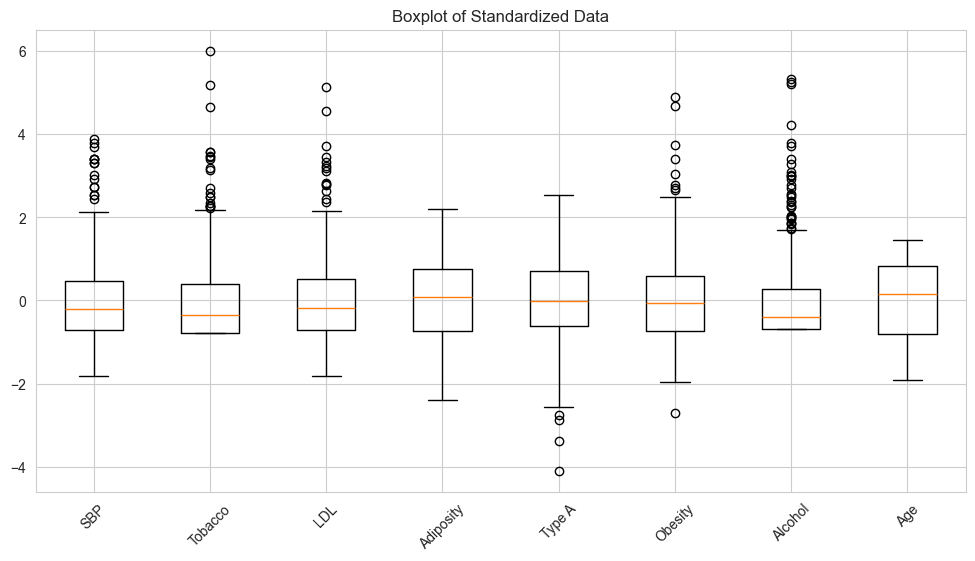

In [88]:
plt.figure(figsize=(12, 6))
plt.boxplot(X_boxplot_standardized)
plt.xticks(range(1, M_boxplot+1), attributeNames_boxplot, rotation=45)
plt.title("Boxplot of Standardized Data")
plt.show()

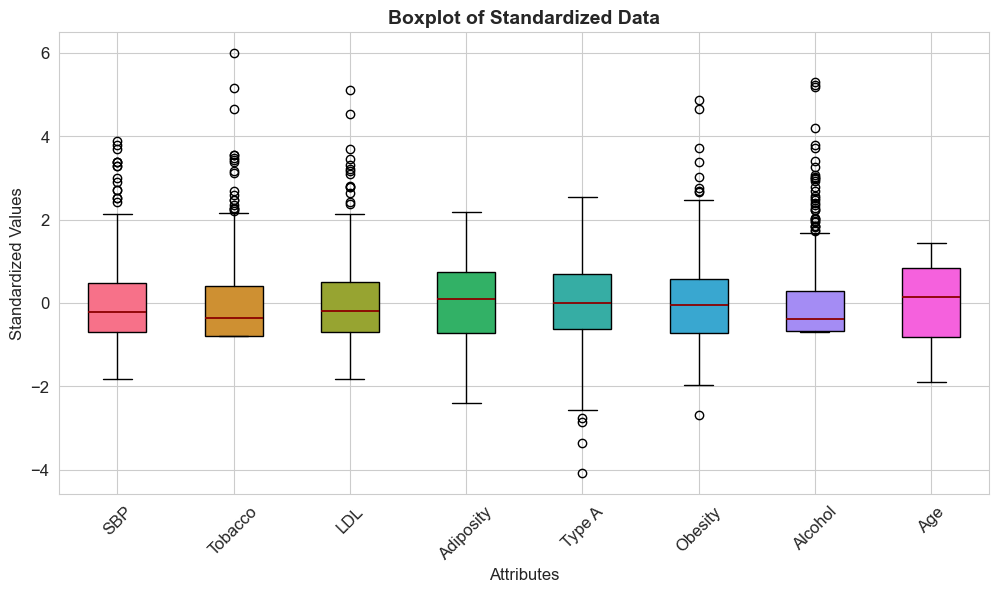

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn style for better visuals
sns.set_style("whitegrid")

# Create a colorful boxplot
plt.figure(figsize=(12, 6))
box = plt.boxplot(X_boxplot_standardized, patch_artist=True,
                  medianprops={"color": "darkred", "linewidth": 1.3})  # Set the thickness of the red mean line

# Define a color palette
colors = sns.color_palette("husl", len(box["boxes"]))

# Color each box in the plot
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

# Customize ticks and labels
plt.xticks(range(1, M_boxplot+1), attributeNames_boxplot, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Boxplot of Standardized Data", fontsize=14, fontweight="bold")
plt.xlabel("Attributes", fontsize=12)
plt.ylabel("Standardized Values", fontsize=12)

# Show the plot
plt.show()


### Histogram

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming X_boxplot is your data matrix (N x M_boxplot) and attributeNames_boxplot is the list of labels

plt.figure(figsize=(12, 6))

# Calculate grid dimensions
u = np.floor(np.sqrt(M_boxplot))
v = np.ceil(float(M_boxplot) / u)

# Define a color palette for the histograms
colors = sns.color_palette("husl", M_boxplot)

# Loop through each attribute to create a subplot
for i in range(M_boxplot):
    plt.subplot(int(u), int(v), i + 1)  # Create subplot in grid
    plt.hist(X_boxplot[:, i], color=colors[i], bins=20, edgecolor='black', alpha=0.7)  # Create histogram with color
    plt.xlabel(attributeNames_boxplot[i])  # Label for the x-axis
    plt.ylim(0, N_boxplot / 2)  # Set y-axis limits

plt.suptitle("Histograms of Standardized Data", fontsize=16, fontweight="bold")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()



NameError: name 'M_boxplot' is not defined

<Figure size 1200x600 with 0 Axes>